## Problem Set #7

MACS 30150, Dr. Evans

Ruoyun Tan

### Problem 1

#### (a)

In [98]:
import pandas as pd

wine_data = pd.read_csv('data/strongdrink.txt')
wine_data.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [99]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegression

X = wine_data[['alco', 'malic', 'tot_phen', 'color_int']] 
y = wine_data['cultivar']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.25,
       random_state=20)

Multi_LG = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)

print(pd.DataFrame({"cultivar = 1": np.append(Multi_LG.intercept_[0], Multi_LG.coef_[0]),
              "cultivar = 2": np.append(Multi_LG.intercept_[1], Multi_LG.coef_[1])},
               index=["beta0","beta1",'beta2','beta3','beta4']))

y_pred = Multi_LG.predict(X_test)
print(classification_report(y_test, y_pred))

       cultivar = 1  cultivar = 2
beta0    -24.011332     22.801680
beta1      1.700433     -1.467985
beta2     -0.265610     -0.333051
beta3      1.223894      0.664006
beta4      0.022748     -0.922709
              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        10

    accuracy                           0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44



In [100]:
print("The error rate for j = 1 is", 1 - 0.87)
print("The error rate for j = 2 is", 1 - 1)
print("The error rate for j = 3 is", 1 - 1)

The error rate for j = 1 is 0.13
The error rate for j = 2 is 0
The error rate for j = 3 is 0


As shown in the classification_report printed above, the model is best at predicting the third category of cultivar where the f1-score is the highest. 

In [101]:
wine_data["cultivar"].value_counts()

2    71
1    59
3    46
Name: cultivar, dtype: int64

Although the model is best at predicting the third category of cultivar, this category does not have the most observations (it has the least observations).

In [102]:
print('MSE from the test set =', mean_squared_error(y_test, y_pred))

MSE from the test set = 0.045454545454545456


#### (b)

In [120]:
from sklearn.model_selection import train_test_split, LeaveOneOut

Xvars = wine_data[['alco', 'malic', 'tot_phen', 'color_int']].values
yvars = wine_data['cultivar'].values
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
CV_vec = np.zeros(N_loo)
y_pred = np.zeros(X.shape[0])
y = np.zeros(X.shape[0])

for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    y[test_index] = y_test
    LogReg = LogisticRegression(solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred[test_index] = LogReg.predict(X_test)
    if y_pred[test_index] == y_test:
        CV_vec[test_index] = 0
    else:
        CV_vec[test_index] = 1 
    

CV_loo = CV_vec.mean()
CV_loo_std = CV_vec.std()

In [121]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       780
         1.0       0.90      0.93      0.92        59
         2.0       0.91      0.90      0.91        71
         3.0       0.96      0.93      0.95        46

    accuracy                           0.99       956
   macro avg       0.94      0.94      0.94       956
weighted avg       0.99      0.99      0.99       956



In [122]:
print("The error rate for j = 1 is", 1 - 0.90)
print("The error rate for j = 2 is", 1 - 0.91)
print("The error rate for j = 3 is", 1 - 0.96)

The error rate for j = 1 is 0.09999999999999998
The error rate for j = 2 is 0.08999999999999997
The error rate for j = 3 is 0.040000000000000036


Just like before, the third category still has the smallest error rate. The error rate for the second category is higher than it was in (a), while the error rate for the first category is smaller.

In [123]:
print('test estimate MSE loocv=', CV_loo,
      ', test estimate MSE standard err=', CV_loo_std)

test estimate MSE loocv= 0.07954545454545454 , test estimate MSE standard err= 0.2705882022679695


#### (c)

In [124]:
from sklearn.model_selection import KFold

k = 4
kf = KFold(n_splits=4, shuffle=True, random_state=10)
kf.get_n_splits(Xvars)

4

In [127]:
MSE_vec_kf = np.zeros(k)
k_ind = int(0)
y_pred = np.zeros(X.shape[0])
y = np.zeros(X.shape[0])

for train_index, test_index in kf.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    LogReg = LogisticRegression(solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y[test_index] = y_test
    y_pred[test_index] = LogReg.predict(X_test)
    indicator = y_pred[test_index] != y_test
    MSE_vec_kf[k_ind] = indicator.mean()
    k_ind += 1
    

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()

In [128]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       780
         1.0       0.87      0.93      0.90        59
         2.0       0.91      0.87      0.89        71
         3.0       0.96      0.93      0.95        46

    accuracy                           0.98       956
   macro avg       0.94      0.94      0.93       956
weighted avg       0.98      0.98      0.98       956



In [129]:
print("The error rate for j = 1 is", 1 - 0.87)
print("The error rate for j = 2 is", 1 - 0.91)
print("The error rate for j = 3 is", 1 - 0.96)

The error rate for j = 1 is 0.13
The error rate for j = 2 is 0.08999999999999997
The error rate for j = 3 is 0.040000000000000036


Compared to those from part (a), the error rate for j = 1 is the same, but the error rates for j = 2 and j =3 increases. The error rate for j = 3 is still the smallest.

Compared to those from part (b), the error rates for j = 2 and j = 3 are the same, but the error rates for j = 1 increases. The error rate for j = 3 is still the smallest.

In [130]:
print('test estimate MSE k-fold=', MSE_kf,
      'test estimate MSE standard err=', MSE_kf_std)

test estimate MSE k-fold= 0.09090909090909091 test estimate MSE standard err= 0.04821182598999188


### Problem 2

#### (a)

In [110]:
df = pd.read_csv("data/CoolIndex.txt", names=["Age", "Coolness"])
df.head()

,Age,Coolness
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


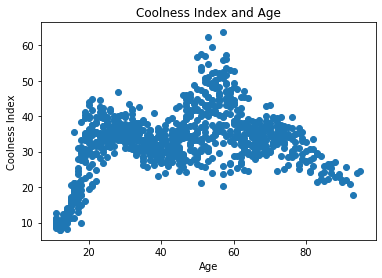

In [111]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['Coolness'])
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index and Age")
plt.show()

#### (b)

In [112]:
import statsmodels.api as sm

df["bin1"] = np.where((df.Age >= 11) & (df.Age < 22), 1, 0)
df["bin2"] = np.where((df.Age >= 22) & (df.Age < 40), 1, 0)
df["bin3"] = np.where((df.Age >= 40) & (df.Age < 59), 1, 0)
df["bin4"] = np.where((df.Age >= 59) & (df.Age < 77), 1, 0)
df["bin5"] = np.where((df.Age >= 77) & (df.Age <= 95), 1, 0)

X = df[["bin1", "bin2", "bin3", "bin4", "bin5"]]
res = sm.OLS(df['Coolness'], X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Coolness   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 24 Feb 2020   Prob (F-statistic):          3.73e-114
Time:                        23:52:21   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bin1          20.1025      0.562     35.746      0.0

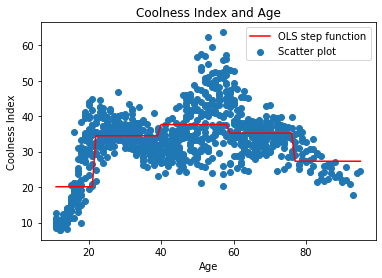

In [113]:
plt.scatter(df['Age'], df['Coolness'], label="Scatter plot")
plt.plot(df['Age'], res.predict(), color='r', label="OLS step function")
plt.legend(loc="upper right")
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index and Age")
plt.show()

In [114]:
print("The stimated step function values are:")
print(res.params)

The stimated step function values are:
bin1    20.102457
bin2    34.475788
bin3    37.635105
bin4    35.225400
bin5    27.296378
dtype: float64


In [115]:
print('The predicted coolness of a 73-year old is', res.params[3])

The predicted coolness of a 73-year old is 35.22540004024275


#### (c)

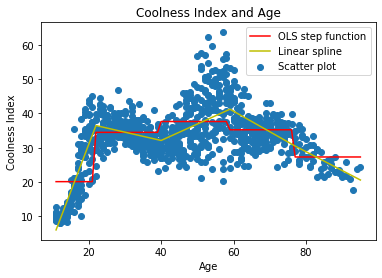

In [116]:
from scipy.interpolate import LSQUnivariateSpline as lsq

t = np.array([22,40,59,77])
df_group = df.groupby('Age').mean()
df_group['Age']=df_group.index
linear_sp = lsq(df_group['Age'].values, df_group['Coolness'].values, t, k=1)

plt.scatter(df['Age'], df['Coolness'], label="Scatter plot")
plt.plot(df['Age'], res.predict(), color='r', label="OLS step function")
plt.plot(df_group['Age'], linear_sp(df_group['Age']), color='y', label="Linear spline")
plt.legend(loc="upper right")
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index and Age")
plt.show()

In [117]:
print('The predicted coolness of a 73-year old is', linear_sp(73))

The predicted coolness of a 73-year old is 32.86784862349653


#### (d)

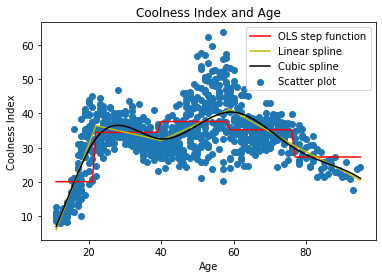

In [118]:
cubic_sp = lsq(df_group['Age'].values, df_group['Coolness'].values, t, k=3)

plt.scatter(df['Age'], df['Coolness'], label="Scatter plot")
plt.plot(df['Age'], res.predict(), color='r', label="OLS step function")
plt.plot(df_group['Age'], linear_sp(df_group['Age']), color='y', label="Linear spline")
plt.plot(df_group['Age'], cubic_sp(df_group['Age']), color='k', label="Cubic spline")
plt.legend(loc="upper right")
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index and Age")
plt.show()

In [97]:
print('The predicted coolness of a 73-year old is', cubic_sp(73))

The predicted coolness of a 73-year old is 32.642301066279764
